In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chi2, norm, cauchy
from iminuit import Minuit
from iminuit.cost import LeastSquares
# Cambiare directory per spostarsi nella cartella principale
import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

#importo libreria
import sys
sys.path.append('Config')
from lablib import *


In [2]:
# #definisco le varie funzioni
# def gauss(x, mu, sigma, a):
#     return a * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# def gauss_cost(x, mu, sigma, a, cost):
#     return gauss(x, mu, sigma, a) + cost

# def gauss_pol2(x, mu, sigma, a, b, c, cost):
#     return gauss(x, mu, sigma, a) + b*x + c * x**2 + cost

# def gauss_exp(x, mu, sigma, a, b):
#     return gauss(x, mu, sigma, a) + b * np.exp(-x) 

# def gauss_pol3 (x, mu, sigma, a, b, c, cost, d):
#     return gauss_pol2(x, mu, sigma, a, b, c, cost) + d* x**3

# SODIO

C:\Users\matte\AppData\Local\Temp\ipykernel_2768\3818175333.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('Dati/Parte 2/BGO/Sodio_55.5V.txt', delim_whitespace= True, skiprows = 65, header=None, encoding= 'ISO-8859-1', names= ['ADC', 'Counts'])
C:\Users\matte\AppData\Local\Temp\ipykernel_2768\3818175333.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_bkg = pd.read_csv ('Dati/Parte 2/BGO/Bkg_55.5V.txt', delim_whitespace = True, header = None, skiprows = 65, encoding = 'ISO-8859-1', names = ['ADC', 'Counts'])


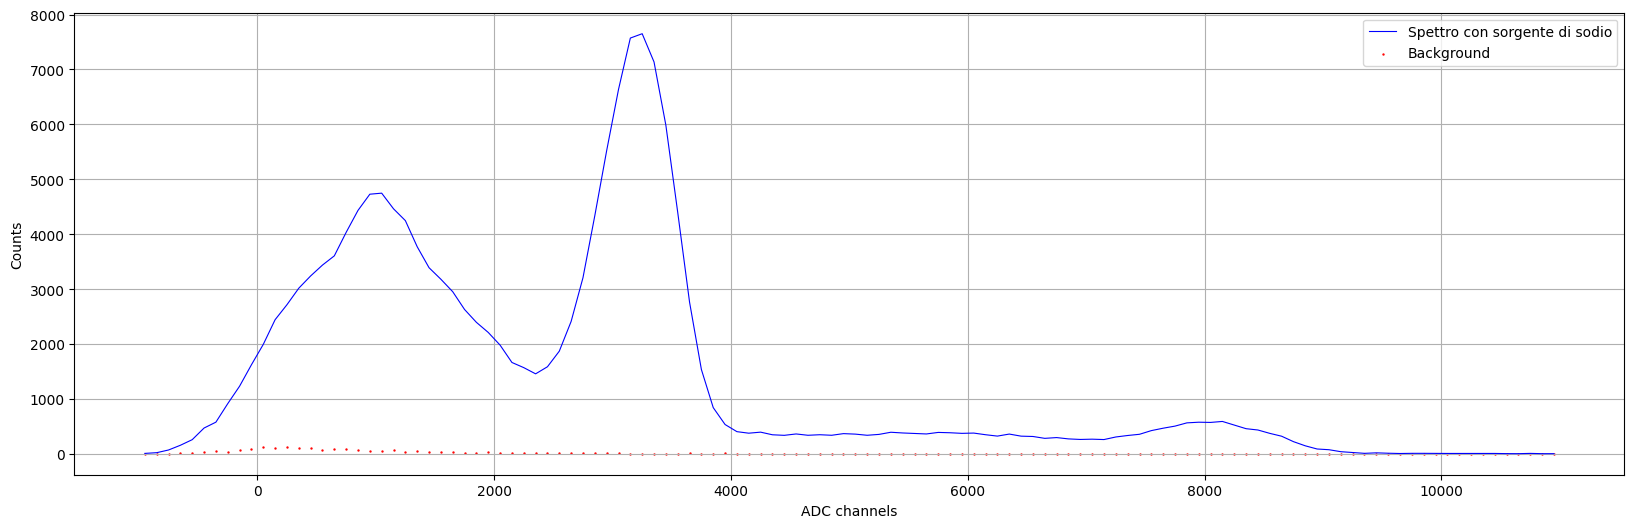

In [3]:
#prendo i dati
df = pd.read_csv('Dati/Parte 2/BGO/Sodio_55.5V.txt', delim_whitespace= True, skiprows = 65, header=None, encoding= 'ISO-8859-1', names= ['ADC', 'Counts'])
df_bkg = pd.read_csv ('Dati/Parte 2/BGO/Bkg_55.5V.txt', delim_whitespace = True, header = None, skiprows = 65, encoding = 'ISO-8859-1', names = ['ADC', 'Counts'])
fig, ax = plt.subplots(figsize = (20,6))
plt.plot(df['ADC'][:120], df['Counts'][:120], label = 'Spettro con sorgente di sodio', color = 'blue', linewidth = 0.8)
plt.scatter(df_bkg['ADC'][:120], df_bkg['Counts'][:120], label = 'Background', color = 'red', s = 0.5)
plt.xlabel('ADC channels')
plt.ylabel('Counts')
plt.legend()
plt.grid()
# plt.title('Cristallo BGO Sodio')

## Primo picco

In [4]:
start_index = 30
end_index = 56
df_primo_picco_sodio = df.iloc[start_index:end_index]
err_primo_picco_sodio = np.array(np.sqrt(df_primo_picco_sodio['Counts'][:]))
#print(err_primo_picco_sodio)


In [5]:
pars, vals, ers, *other = LS_fit(df_primo_picco_sodio['ADC'], df_primo_picco_sodio['Counts'], err_primo_picco_sodio, gauss_pol2,
                                  mu = 3170, sigma = 270, S = 7000, a = 1000, b  = 0 , c = 0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 167.6 (χ²/ndof = 8.4)      │              Nfcn = 299              │
│ EDM = 5.42e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 3.2109e3  │ 0.0017e3  │            │            │         │         │       │
│ 1 │ sigma │   294.2   │    2.0    │            │            │         │         │       │
│ 2 │ S     │  7.28e3   │  0.05e3   │            │            │         │         │       │
│ 3 │ a     │  6.97e3   │  0.23e3   │            │            │         │         │       │
│ 4 │ b     │   -3.32   │   0.15    │            │            │         │         │       │
│ 5 │ c     │ 0.413e-3  │ 0.023e-3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────┐
│       │           mu        sigma            S            a            b            c │
├───────┼───────────────────────────────────────────────────────────────────────────────┤
│    mu │         2.77         -0.5          7.0         66.5       -0.035    4.5400e-6 │
│ sigma │         -0.5         3.88           -7          251       -0.183   28.6149e-6 │
│     S │          7.0           -7     2.07e+03        3.7e3       -2.548  392.7450e-6 │
│     a │         66.5          251        3.7e3     5.25e+04      -34.813 5.2271101e-3 │
│     b │       -0.035       -0.183       -2.548      -34.813       0.0234   -3.5378e-6 │
│     c │    4.5400e-6   28.6149e-6  392.7450e-6 5.2271101e-3   -3.5378e-6     5.37e-10 │
└───────┴───────────────────────────────────────────────────────────────────────────────┘

In [ ]:
for i in range(len(vals)):
    print(f'{pars[i]} = {vals[i]} +/- {ers[i]}')

print (conv_ADC_Energy(vals[0]))

mu = 3210.8824045897964 +/- 1.6654564113690205
sigma = 294.19600168025454 +/- 1.9687525716249845
S = 7283.555740759644 +/- 45.453022357265326
a = 6972.9279233384605 +/- 229.0954970273156
b = -3.32425464894481 +/- 0.15295992134974515
c = 0.0004126884833682517 +/- 2.3175732546684605e-05


In [7]:
risol_na_1 = 2.355 * vals[1]/vals[0]

## Secondo picco

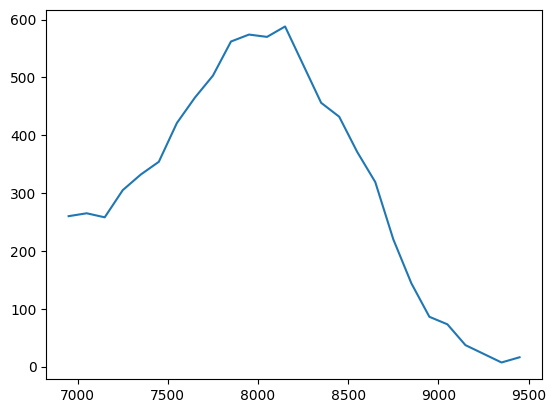

In [8]:
start_index = 79
end_index = 105
df_secondo_picco_sodio = df.iloc[start_index : end_index]
err_secondo_picco_sodio = np.array(np.sqrt(df_secondo_picco_sodio['Counts']))
plt.plot(df_secondo_picco_sodio['ADC'], df_secondo_picco_sodio['Counts'])
#print(df_secondo_picco_sodio)

In [9]:
pars, vals, errs, *others = LS_fit(df_secondo_picco_sodio['ADC'], df_secondo_picco_sodio['Counts'], err_secondo_picco_sodio,
                                    gauss_pol1, mu = 8000, sigma = 350, S = 500, a = 0, b= 0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 50.53 (χ²/ndof = 2.4)      │              Nfcn = 306              │
│ EDM = 2.81e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  8.073e3  │  0.012e3  │            │            │         │         │       │
│ 1 │ sigma │    438    │    12     │            │            │         │         │       │
│ 2 │ S     │    464    │    11     │            │            │         │         │       │
│ 3 │ a     │    920    │    50     │            │            │         │         │       │
│ 4 │ b     │  -0.097   │   0.005   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────────────────────────┐
│       │          mu       sigma           S           a           b │
├───────┼─────────────────────────────────────────────────────────────┤
│    mu │         150     -0.09e3     -0.04e3      0.41e3  -43.925e-3 │
│ sigma │     -0.09e3         150      0.02e3     -0.43e3   44.173e-3 │
│     S │     -0.04e3      0.02e3         125     -0.31e3   32.681e-3 │
│     a │      0.41e3     -0.43e3     -0.31e3    2.59e+03 -273.472e-3 │
│     b │  -43.925e-3   44.173e-3   32.681e-3 -273.472e-3    2.89e-05 │
└───────┴─────────────────────────────────────────────────────────────┘

In [10]:
risol_na_2 = 2.355 * vals[1]/vals[0]

# COBALTO

C:\Users\matte\AppData\Local\Temp\ipykernel_2768\857190031.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('Dati/Parte 2/BGO/Cobalto_55.5V_bins100.txt', delim_whitespace= True, skiprows = 65, header=None, encoding= 'ISO-8859-1', names= ['ADC', 'Counts'])
C:\Users\matte\AppData\Local\Temp\ipykernel_2768\857190031.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_bkg = pd.read_csv ('Dati/Parte 2/BGO/Bkg_55.5V.txt', delim_whitespace = True, header = None, skiprows = 65, encoding = 'ISO-8859-1', names = ['ADC', 'Counts'])


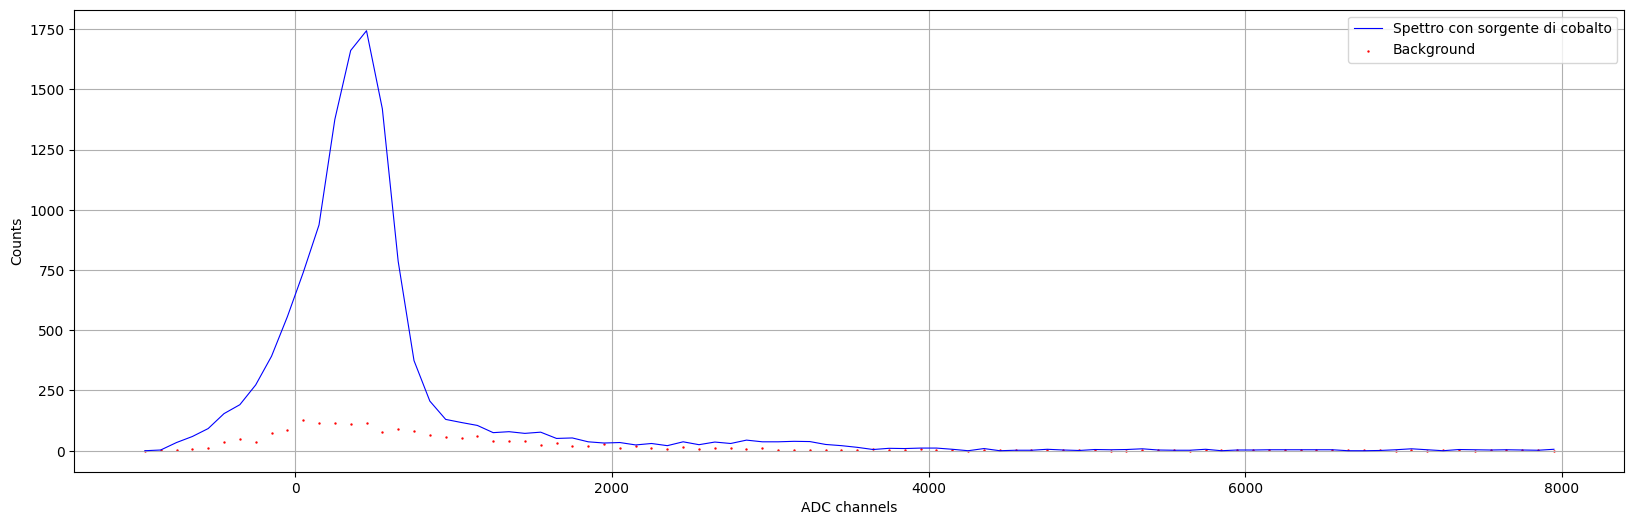

In [11]:
# prendo i dati
df = pd.read_csv('Dati/Parte 2/BGO/Cobalto_55.5V_bins100.txt', delim_whitespace= True, skiprows = 65, header=None, encoding= 'ISO-8859-1', names= ['ADC', 'Counts'])
df_bkg = pd.read_csv ('Dati/Parte 2/BGO/Bkg_55.5V.txt', delim_whitespace = True, header = None, skiprows = 65, encoding = 'ISO-8859-1', names = ['ADC', 'Counts'])
fig, ax = plt.subplots(figsize = (20,6))
plt.plot(df['ADC'][:90], df['Counts'][:90], label = 'Spettro con sorgente di cobalto', color = 'blue', linewidth = 0.8)
plt.scatter(df_bkg['ADC'][:90], df_bkg['Counts'][:90], label = 'Background', color = 'red', s = 0.5)
plt.legend()
plt.xlabel('ADC channels')
plt.ylabel('Counts')
plt.grid()
# plt.title('Cristallo BGO Cobalto')

In [12]:
filtrato = df['Counts'][0:100] - df_bkg['Counts'][0:100]
#print(df_filtrato['Counts'][:])
start_index = 6
end_index = 20
# filtrato = df.iloc[start_index:end_index]
#df_bkg = df_bkg[start_index:end_index]
err_filtrato = np.array(np.sqrt(filtrato[start_index:end_index]) + np.sqrt(df_bkg['Counts'][start_index:end_index]))


In [13]:
pars, vals, ers, *other = LS_fit(df['ADC'][start_index:end_index], filtrato[start_index:end_index], err_filtrato,
                                  gauss_pol3, mu = 500, sigma = 250, S  = 1000, a = 0, b = 0, d = 0, c=0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 15.01 (χ²/ndof = 2.1)      │              Nfcn = 436              │
│ EDM = 2.26e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │    418    │     6     │            │            │         │         │       │
│ 1 │ sigma │    180    │    10     │            │            │         │         │       │
│ 2 │ S     │  1.44e3   │  0.08e3   │            │            │         │         │       │
│ 3 │ a     │    390    │    40     │            │            │         │         │       │
│ 4 │ b     │   0.07    │   0.15    │            │            │         │         │       │
│ 5 │ c     │ -1.54e-3  │  0.18e-3  │            │            │         │         │       │
│ 6 │ d     │  1.16e-6  │  0.31e-6  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│       │             mu          sigma              S              a              b              c              d │
├───────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│    mu │           34.4             15            182             -7         -0.360    -723.490e-6  1.15031628e-6 │
│ sigma │             15           99.3            590           -320         -1.386    -361.857e-6  2.21348089e-6 │
│     S │            182            590       6.59e+03         -2.4e3        -11.454   -4.734765e-3 20.21103506e-6 │
│     a │             -7           -320         -2.4e3       1.44e+03          4.928   -1.240572e-3 -5.63274001e-6 │
│     b │         -0.360         -1.386        -11.454          4.928         0.0241       8.522e-6   -40.77286e-9 │
│     c │    -723.490e-6    -361.857e-6   -4.734765e-3   -1.240572e-3       8.522e-6       3.37e-08     -43.73e-12 │
│     d │  1.15031628e-6  2.21348089e-6 20.21103506e-6 -5.63274001e-6   -40.77286e-9     -43.73e-12       9.74e-14 │
└───────┴──────────────────────────────────────────────────────────────────────────────────────────────────────────┘

In [14]:
for i in range(len(vals)):
    print(f'{pars[i]} = {vals[i]} +/- {ers[i]}')

mu = 418.4512276208517 +/- 5.862966389882696
sigma = 179.74304902719774 +/- 9.965962070146281
S = 1436.489222266439 +/- 81.16242191813829
a = 389.1332175324289 +/- 37.97009090085425
b = 0.0683236624650951 +/- 0.15519040247333604
c = -0.0015399958128898608 +/- 0.00018368322438927137
d = 1.1567859161088724e-06 +/- 3.12157924882965e-07


In [15]:
risol_cob = 2.355 * vals[1] / vals[0]
print ('risoluzione cobalto 122 keV = ', risol_cob, '\n', 
       'risoluzione sodio 511 keV = ', risol_na_1, '\n',
       'risoluzione sodio 1275 keV = ', risol_na_2)

risoluzione cobalto 122 keV =  1.0115751908907953 
 risoluzione sodio 511 keV =  0.21577606920970735 
 risoluzione sodio 1275 keV =  0.12787644485045213
